# Notebook Structure

1. Import necessary dependencies
2. Create dataset
3. Clusterd bar chart visualization for the categorical features


# 1. Import necessary dependencies

In [124]:
# libraries & dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme(style="darkgrid")

# 2. Create the dataset

In [125]:
# Load the Titanic dataset from seaborn
titanic = sns.load_dataset('titanic')

In [126]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [127]:
titanic.shape

(891, 15)

# 3. Clustered bar chart visualization for the categorical features

### A. Contingengy tables are created and printed

In [128]:
# --- Contingency Tables ---
survived_pclass = pd.crosstab(titanic['pclass'], titanic['survived'])
survived_sex = pd.crosstab(titanic['sex'], titanic['survived'])
survived_class = pd.crosstab(titanic['class'], titanic['survived'])
survived_adult_male = pd.crosstab(titanic['adult_male'], titanic['survived'])
survived_embark_town = pd.crosstab(titanic['embark_town'], titanic['survived'])
survived_alone = pd.crosstab(titanic['alone'], titanic['survived'])
survived_embarked = pd.crosstab(titanic['embarked'], titanic['survived'])

In [129]:
survived_embarked

survived,0,1
embarked,,
C,75,93
Q,47,30
S,427,217


### B. Visualize contingency table using Clustered Bar chart

<Figure size 1800x1000 with 0 Axes>

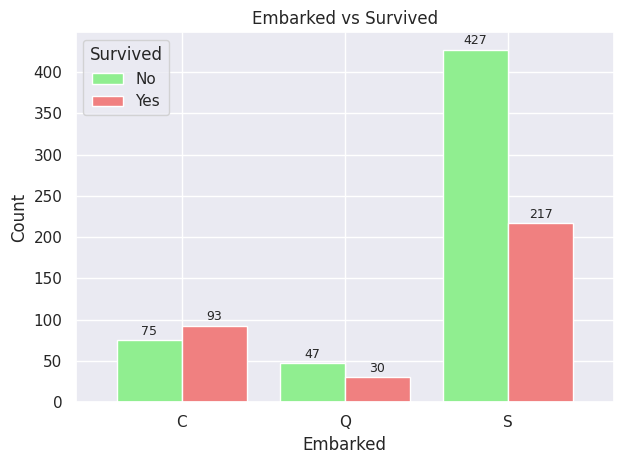

In [130]:
# Create the contingency table for Embarked vs Survived
survived_embarked = pd.crosstab(titanic['embarked'], titanic['survived'])

# Create the clustered bar chart
plt.figure(figsize=(18, 10))
survived_embarked.plot(kind='bar', color=["lightgreen", "lightcoral"], width=0.8)
plt.title("Embarked vs Survived")
plt.xlabel("Embarked")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Survived", labels=['No', 'Yes'], loc='upper left')

# Add value labels above the bars
for p in plt.gca().patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x + width/2., y + height + 3, f'{int(height)}',
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

### C. Visualize all the contingency table using clustered  bar chart

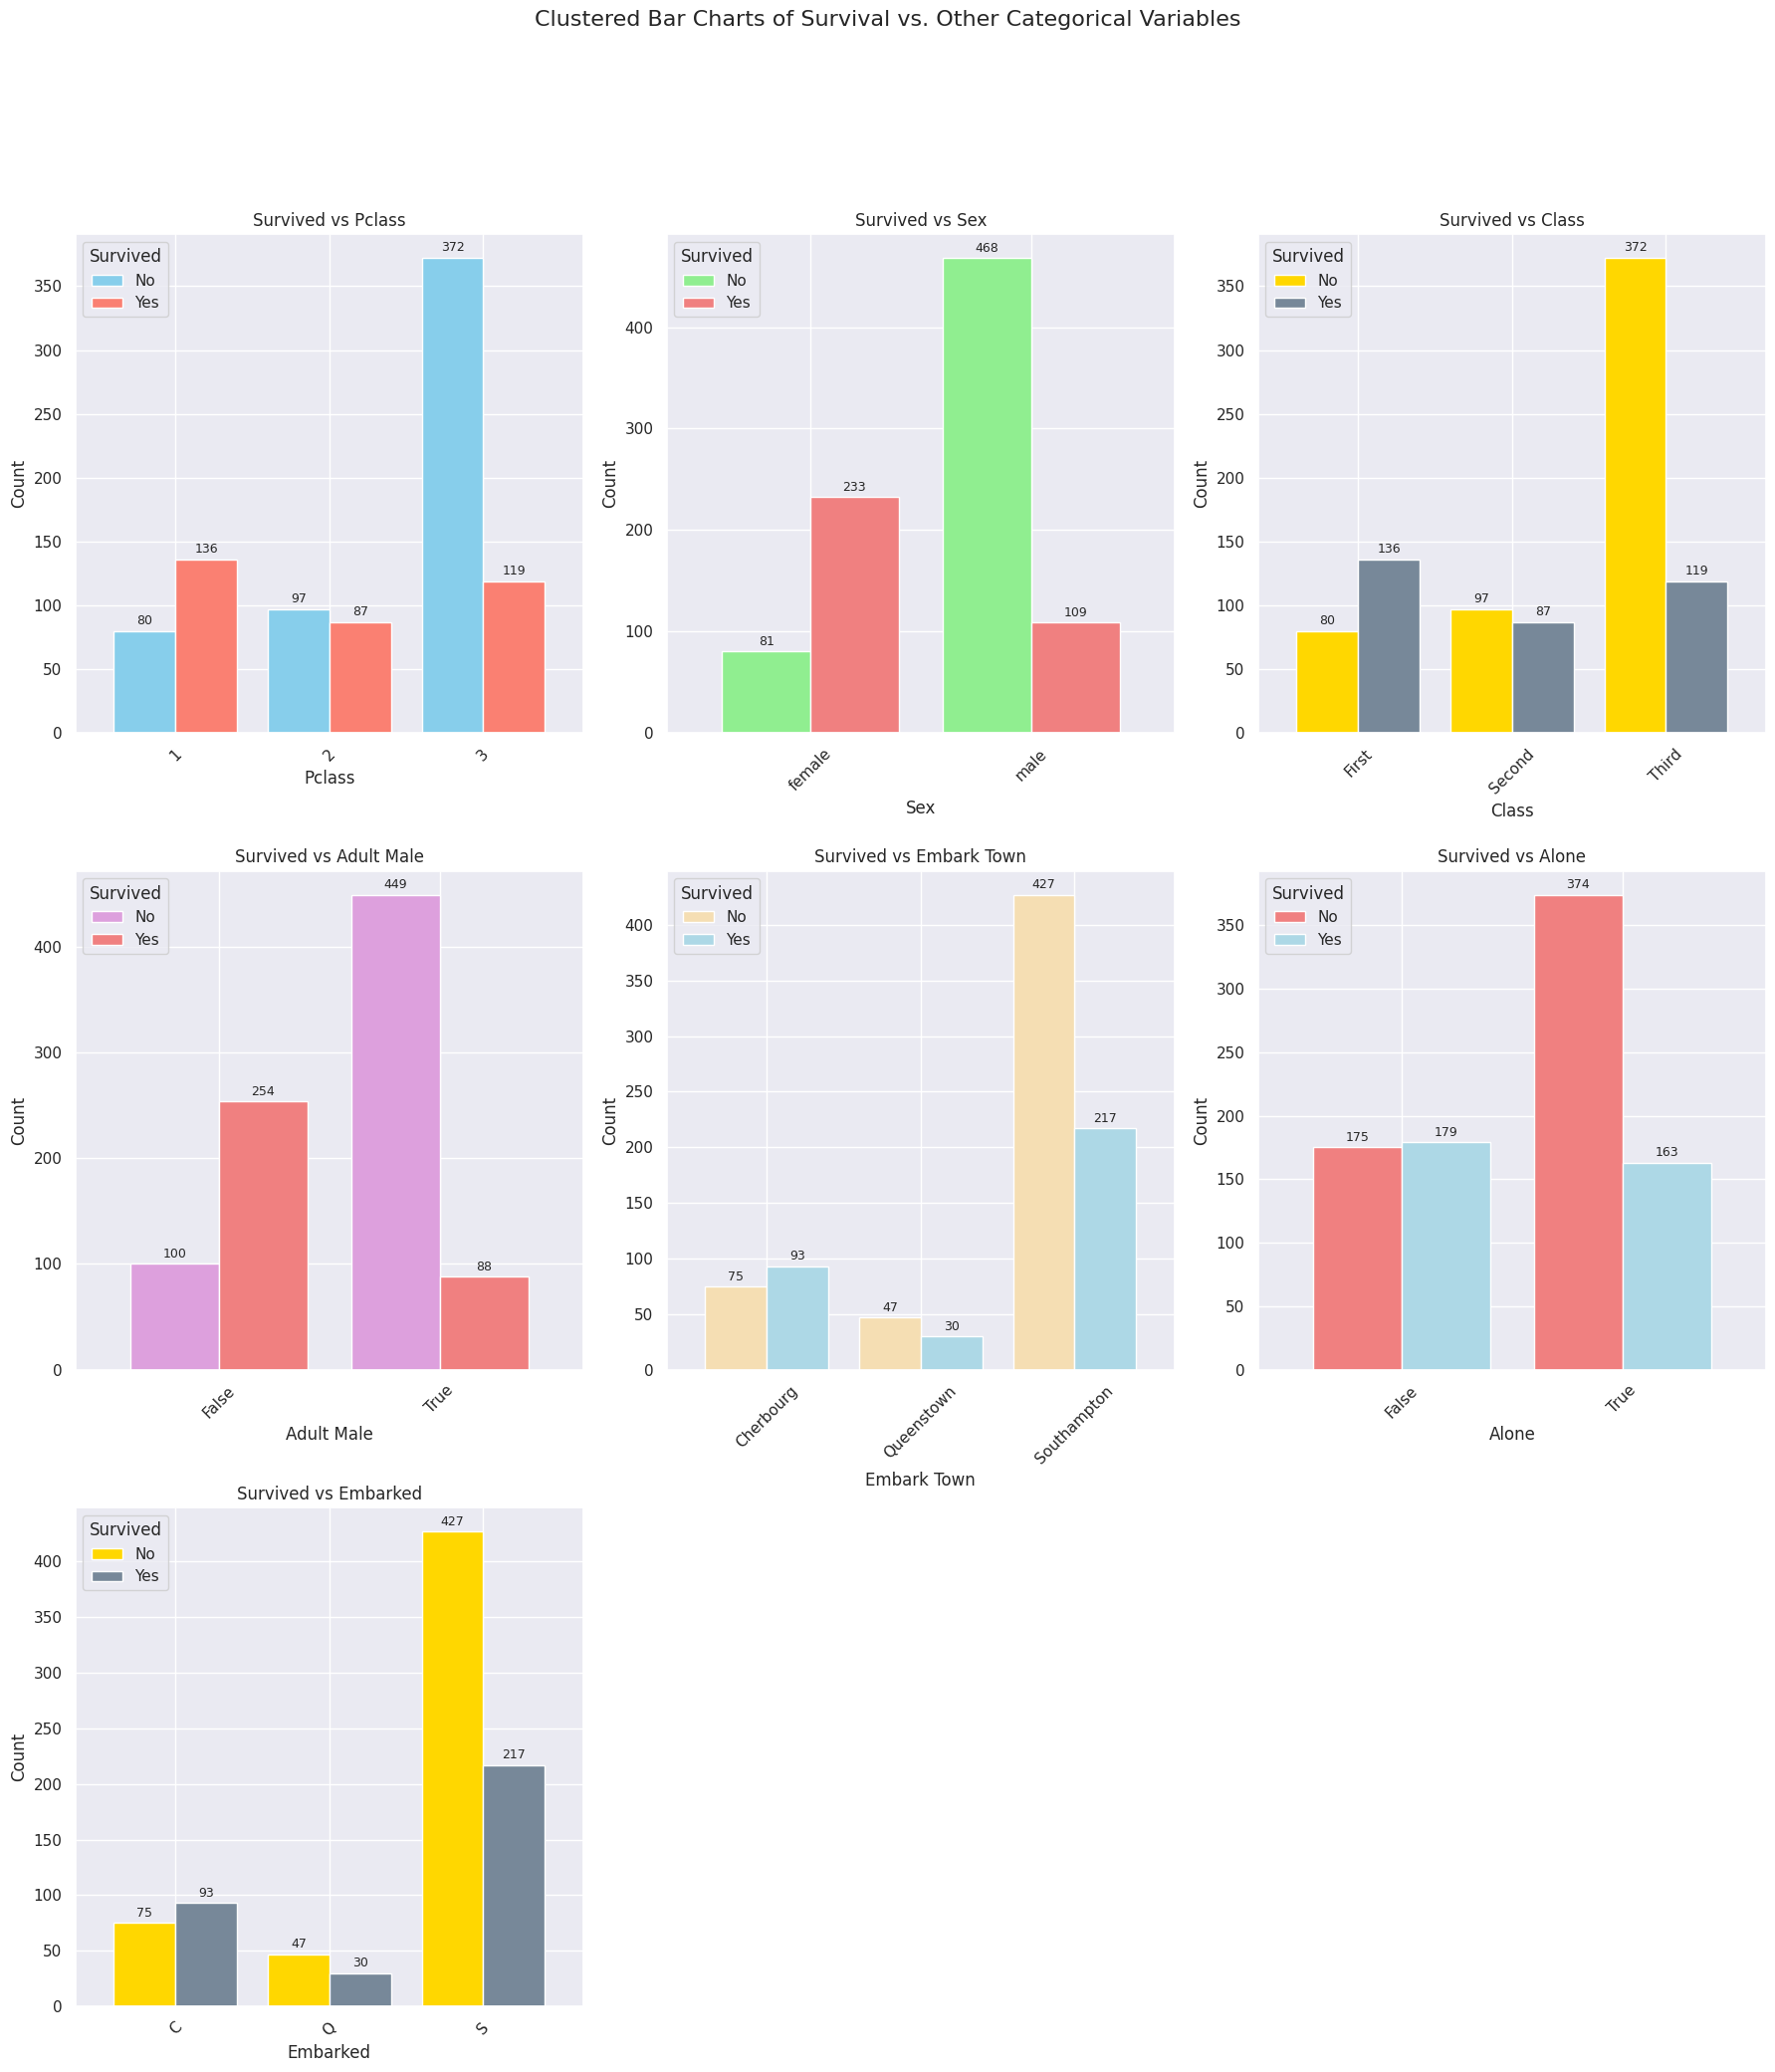

In [133]:
# --- Clustered Bar Charts ---
variables_to_plot = [
    ('Pclass', survived_pclass),
    ('Sex', survived_sex),
    ('Class', survived_class),
    ('Adult Male', survived_adult_male),
    ('Embark Town', survived_embark_town),
    ('Alone', survived_alone),
    ('Embarked', survived_embarked) # Added Embarked
]

color_choices = [
    ["skyblue", "salmon"],
    ["lightgreen", "lightcoral"],
    ["gold", "lightslategrey"],
    ["plum", "lightcoral"],
    ["wheat", "lightblue"],
    ["lightcoral", "lightblue"],
    ["gold", "lightslategrey"]
]

num_plots = len(variables_to_plot)
rows = (num_plots + 2) // 3
cols = min(num_plots, 3)

fig, axes = plt.subplots(rows, cols, figsize=(18, 7 * rows))
fig.suptitle("Clustered Bar Charts of Survival vs. Other Categorical Variables", fontsize=16, y=1.02)

axes = axes.flatten()

for i, (var_name, cont_table) in enumerate(variables_to_plot):
    if i < len(axes):
        colors = color_choices[i % len(color_choices)]
        ax = axes[i]
        cont_table.plot(kind='bar', ax=ax, color=colors, width=0.8) # width adjusts bar spacing
        ax.set_title(f"Survived vs {var_name}")
        ax.set_xlabel(var_name)
        ax.set_ylabel("Count")
        ax.tick_params(axis='x', rotation=45)
        ax.legend(title="Survived", labels=['No', 'Yes'] , loc='upper left')

        # Add value labels above the bars
        for p in ax.patches:
            width = p.get_width()
            height = p.get_height()
            x, y = p.get_xy()
            ax.annotate(f'{int(height)}', (x + width/2., y + height + 3), # Adjust vertical offset (3) as needed
                        ha='center', va='bottom', fontsize=9)

# Remove any unused subplots
if num_plots < len(axes):
    for j in range(num_plots, len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()